In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df['Outcome'] = df['Outcome'].astype('boolean')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [7]:
df.columns = ['Gestações', 'Glicose_conc', 'Pressão_art', 'Espessura_tric', 'Insulina', 'IMC', 'Diabetes_pred', 'Idade', 'Resultado']

In [8]:
df.head()

,Gestações,Glicose_conc,Pressão_art,Espessura_tric,Insulina,IMC,Diabetes_pred,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [9]:
df.isnull().values.any()

False

In [10]:
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (30, 10))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

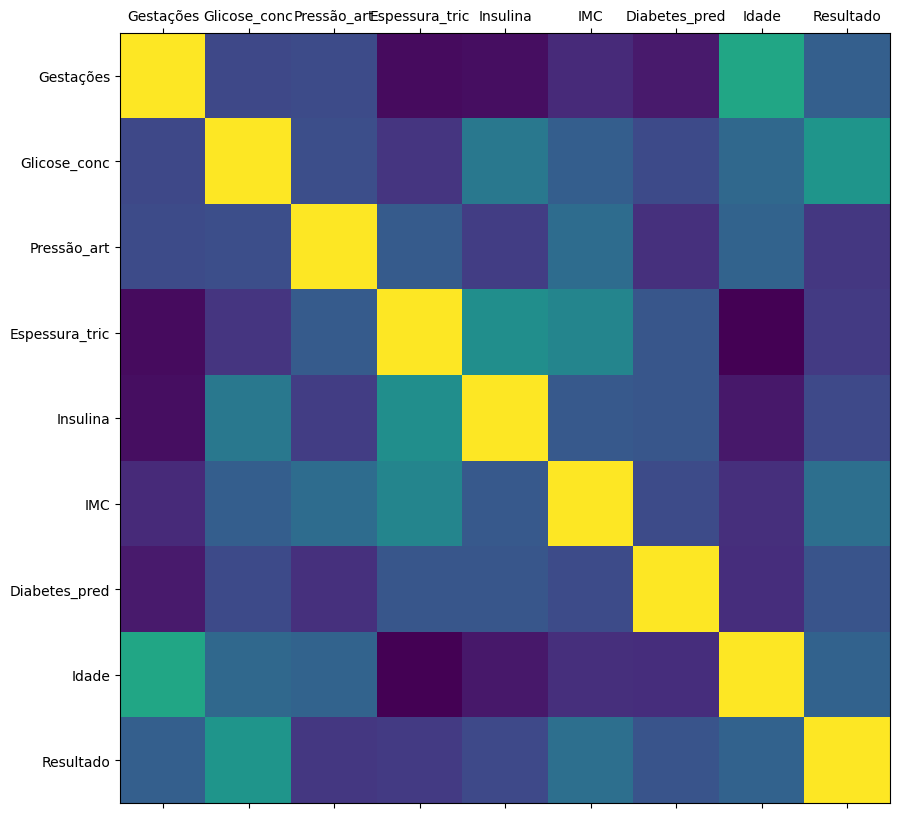

In [11]:
plot_corr(df)

In [12]:
df.corr()

,Gestações,Glicose_conc,Pressão_art,Espessura_tric,Insulina,IMC,Diabetes_pred,Idade,Resultado
Gestações,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glicose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pressão_art,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Espessura_tric,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulina,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
IMC,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Idade,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Resultado,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
diabetes_map = {True : 1, False : 0}

In [14]:
df['Resultado'] = df['Resultado'].map(diabetes_map)

In [15]:
df.head(5)

,Gestações,Glicose_conc,Pressão_art,Espessura_tric,Insulina,IMC,Diabetes_pred,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.tail()

,Gestações,Glicose_conc,Pressão_art,Espessura_tric,Insulina,IMC,Diabetes_pred,Idade,Resultado
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [17]:
verdadeiros = len(df.loc[df['Resultado'] == True])
falsos = len(df.loc[df['Resultado'] == False])
print('Número de casos verdadeiros: ', verdadeiros)
print('Número de casos falsos: ', falsos)

Número de casos verdadeiros:  268
Número de casos falsos:  500


In [18]:
verdadeiros_porc = (verdadeiros / (verdadeiros + falsos)) * 100
print(verdadeiros_porc)

34.89583333333333


In [19]:
falsos_proc = (falsos / (verdadeiros + falsos)) * 100
print(falsos_proc)

65.10416666666666


In [20]:
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(verdadeiros, (verdadeiros/ (verdadeiros + falsos)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(falsos, (falsos/ (verdadeiros + falsos)) * 100))

Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos     : 500 (65.10%)


array([[<Axes: title={'center': 'Gestações'}>,
        <Axes: title={'center': 'Glicose_conc'}>,
        <Axes: title={'center': 'Pressão_art'}>],
       [<Axes: title={'center': 'Espessura_tric'}>,
        <Axes: title={'center': 'Insulina'}>,
        <Axes: title={'center': 'IMC'}>],
       [<Axes: title={'center': 'Diabetes_pred'}>,
        <Axes: title={'center': 'Idade'}>,
        <Axes: title={'center': 'Resultado'}>]], dtype=object)

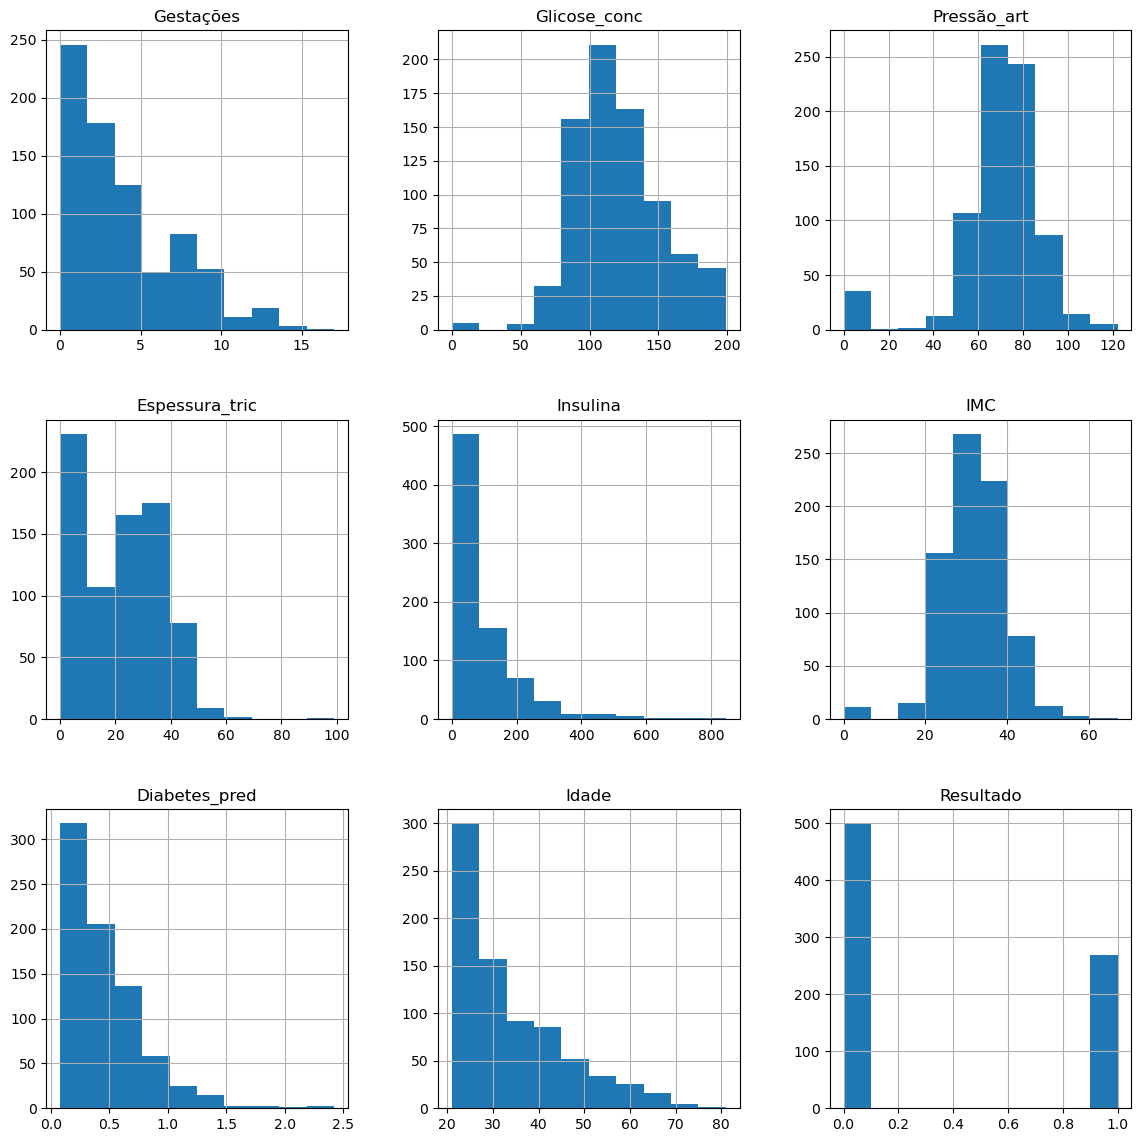

In [21]:
df.hist(figsize=(14,14))


In [22]:
import sklearn as sk

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
atributos = ['Gestações', 'Glicose_conc', 'Pressão_art', 'Espessura_tric', 'Insulina', 'IMC', 'Diabetes_pred', 'Idade']

In [25]:
atrib_prev = ['Resultado']

In [26]:
X = df[atributos].values
Y = df[atrib_prev].values

In [27]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [28]:
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [29]:
split_test_size = 0.30

In [30]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, shuffle=True, random_state = 42)

In [31]:
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

69.92% nos dados de treino
30.08% nos dados de teste


In [32]:
X_treino

array([[  1.   ,  95.   ,  60.   , ...,  23.9  ,   0.26 ,  22.   ],
       [  5.   , 105.   ,  72.   , ...,  36.9  ,   0.159,  28.   ],
       [  0.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

In [33]:
print("Original Verdadeiros : {0} ({1:0.2f}%)".format(len(df.loc[df['Resultado'] == 1]), 
                                               (len(df.loc[df['Resultado'] ==1])/len(df.index) * 100)))

print("Original Falsos : {0} ({1:0.2f}%)".format(len(df.loc[df['Resultado'] == 0]), 
                                               (len(df.loc[df['Resultado'] == 0])/len(df.index) * 100)))
print("")
print("Treino Verdadeiros : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Treino Falsos : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Teste Verdadeiros : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test Falsos : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original Verdadeiros : 268 (34.90%)
Original Falsos : 500 (65.10%)

Treino Verdadeiros : 188 (35.01%)
Treino Falsos : 349 (64.99%)

Teste Verdadeiros : 80 (34.63%)
Test Falsos : 151 (65.37%)


In [34]:
df.isnull().values.any()

False

In [35]:
df.head(10)

,Gestações,Glicose_conc,Pressão_art,Espessura_tric,Insulina,IMC,Diabetes_pred,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [36]:
print("# Linhas no dataframe: {0}".format(len(df)))
print("# Linhas missing Glicose concentração: {0}".format(len(df.loc[df['Glicose_conc'] == 0])))
print("# Linhas missing Pressão Arterial: {0}".format(len(df.loc[df['Pressão_art'] == 0])))
print("# Linhas missing Espessura_tric: {0}".format(len(df.loc[df['Espessura_tric'] == 0])))
print("# Linhas missing Insulina: {0}".format(len(df.loc[df['Insulina'] == 0])))
print("# Linhas missing IMC: {0}".format(len(df.loc[df['IMC'] == 0])))
print("# Linhas missing Idade: {0}".format(len(df.loc[df['Idade'] == 0])))

# Linhas no dataframe: 768
# Linhas missing Glicose concentração: 5
# Linhas missing Pressão Arterial: 35
# Linhas missing Espessura_tric: 227
# Linhas missing Insulina: 374
# Linhas missing IMC: 11
# Linhas missing Idade: 0


In [37]:
from sklearn.impute import SimpleImputer 

In [38]:
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

In [39]:
X_treino

array([[  1.        ,  95.        ,  60.        , ...,  23.9       ,
          0.26      ,  22.        ],
       [  5.        , 105.        ,  72.        , ...,  36.9       ,
          0.159     ,  28.        ],
       [  4.34056399, 135.        ,  68.        , ...,  42.3       ,
          0.365     ,  24.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  4.34056399, 141.        ,  72.24131274, ...,  42.4       ,
          0.205     ,  29.        ],
       [  4.34056399, 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]])

In [40]:
from sklearn.naive_bayes import GaussianNB 

In [41]:
modelo_v1 = GaussianNB()

In [42]:
modelo_v1.fit(X_treino, Y_treino)

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [43]:
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB()

In [44]:
from sklearn import metrics

In [45]:
nb_predict_train = modelo_v1.predict(X_treino)

In [46]:
nb_predict_train

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,

In [47]:
acuracia = metrics.accuracy_score(Y_treino, nb_predict_train)

In [48]:
print("Exatidão (Accuracy):", acuracia)

Exatidão (Accuracy): 0.7541899441340782


In [49]:
nb_predict_test = modelo_v1.predict(X_teste)

In [50]:
nb_predict_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
nb_acc_test = metrics.accuracy_score(Y_teste, nb_predict_test)

In [52]:
print("Exatidão (Accuracy): %.4f" %(nb_acc_test))

Exatidão (Accuracy): 0.7359


In [53]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(random_state=42)

In [56]:
rf_predict_train = modelo_v2.predict(X_treino)
ac_treino = metrics.accuracy_score(Y_treino, rf_predict_train)
print("Exatidão (Accuracy): %.4f" %(ac_treino))

Exatidão (Accuracy): 1.0000


In [57]:
rf_predict_test = modelo_v2.predict(X_teste)
rf_ac_test = metrics.accuracy_score(Y_teste, rf_predict_test)
print("Exatidão (Accuracy): %.4f" %rf_ac_test)

Exatidão (Accuracy): 0.7403


In [58]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 52  28]
 [ 32 119]]

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.65      0.63        80
           0       0.81      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
modelo_v3 = LogisticRegression(C = 0.5, random_state = 42, max_iter = 100)
modelo_v3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo_v3.predict(X_teste)

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
ac_teste_rl = metrics.accuracy_score(Y_teste, lr_predict_test)
print("Exatidão (Accuracy): %.4f" % ac_teste_rl)
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.7446

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.60      0.62        80
           0       0.79      0.82      0.81       151

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [62]:
print("Exatidão nos dados de teste")

print("Modelo usando algoritmo Naive Bayes:", nb_acc_test)
print("Modelo usando algoritmo Random Forest:", rf_ac_test)
print("Modelo usando algoritmo Regressão Logística:", ac_teste_rl)

Exatidão nos dados de teste
Modelo usando algoritmo Naive Bayes: 0.7359307359307359
Modelo usando algoritmo Random Forest: 0.7402597402597403
Modelo usando algoritmo Regressão Logística: 0.7445887445887446


In [63]:
import pickle

In [64]:
filename = 'modelo_treinado_v3.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))

In [65]:
X_teste

array([[6.00000000e+00, 9.80000000e+01, 5.80000000e+01, ...,
        3.40000000e+01, 4.30000000e-01, 4.30000000e+01],
       [2.00000000e+00, 1.12000000e+02, 7.50000000e+01, ...,
        3.57000000e+01, 1.48000000e-01, 2.10000000e+01],
       [2.00000000e+00, 1.08000000e+02, 6.40000000e+01, ...,
        3.08000000e+01, 1.58000000e-01, 2.10000000e+01],
       ...,
       [4.85714286e+00, 1.27000000e+02, 8.00000000e+01, ...,
        3.63000000e+01, 8.04000000e-01, 2.30000000e+01],
       [6.00000000e+00, 1.05000000e+02, 7.00000000e+01, ...,
        3.08000000e+01, 1.22000000e-01, 3.70000000e+01],
       [5.00000000e+00, 7.70000000e+01, 8.20000000e+01, ...,
        3.58000000e+01, 1.56000000e-01, 3.50000000e+01]])

In [66]:
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[9].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[18].reshape(1, -1))
print()
print(X_teste[9])
print("Predição do modelo:", resultado1)
print("Valor real:", Y_teste[9])
print()
print("Predição do modelo:", resultado2)
print("Valor real:", Y_teste[18])


[  5.         147.          78.          30.37974684 156.05084746
  33.7          0.218       65.        ]
Predição do modelo: [1]
Valor real: [0]

Predição do modelo: [1]
Valor real: [1]


In [67]:
novos_valores = [5., 130.0, 75.0, 32. ,152. , 33. , 0.215 , 58.]

In [68]:
resultado3 = loaded_model.predict(np.array(novos_valores).reshape(1, -1))


In [69]:
print()
print(novos_valores)
print("Predição do modelo:", resultado3)



[5.0, 130.0, 75.0, 32.0, 152.0, 33.0, 0.215, 58.0]
Predição do modelo: [1]
